# Ford GoBike Usage Data and Findings
## by Cynthia Leu

## Investigation Overview

Ford GoBike is a regional public bicycle sharing system in California's San Francisco Bay Area. In this presentation, I will be investigating some customer characteristics and patterns. I will be focusing on the usage demand of their two different groups of users: (1) subscribers, who pay a subscription fee, and (2) customers, who are casual riders.

## Dataset Overview

The raw dataset is from their February 2019 individual trip data, provided [online](https://s3.amazonaws.com/baywheels-data/index.html) for free public use. After some data wrangling, the final dataset has 21 variables and 170K+ Ford GoBike individual trip records. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike = pd.read_csv('201902-fordgobike-tripdata-clean.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Bike Usage by User Type

> There are two general types of Ford GoBike users, subscribers and customers. Almost 91% of all bike usage were from subscribers, while only 9% are customers. In whole value terms, 160K trips were made by subscribers and only about 20K trips were made by customers.

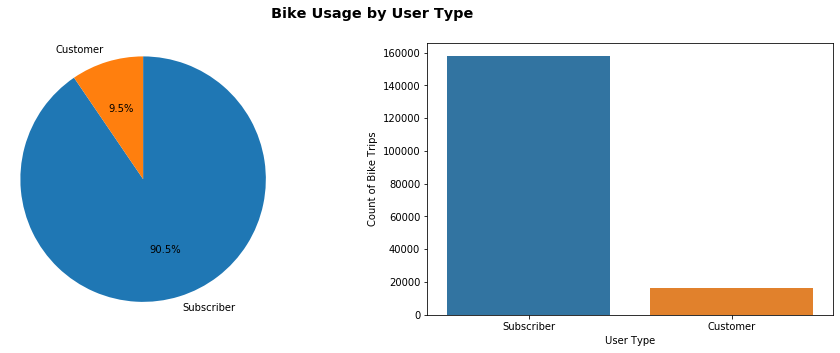

In [3]:
user = bike.user_type.value_counts()

plt.figure(figsize = [16, 5])
plt.suptitle('Bike Usage by User Type', fontsize = 'x-large', fontweight = 'bold')

# Pie Chart
plt.subplot(1, 2, 1)
plt.pie(user, labels = user.index, startangle = 90, autopct = '%1.1f%%', 
        counterclock = False, textprops = {'color':'black'})
plt.axis('square')

# Bar Chart
plt.subplot(1, 2, 2)
sb.countplot(data = bike, x = 'user_type', order = user.index)
plt.xlabel('User Type')
plt.ylabel('Count of Bike Trips');

## Hourly Usage by Day of Week and User Type

> Subscribers and customers have very different ride patterns. Subscribers ride most on weekdays, especially during those morning (8-9am) and late afternoon (5-6pm) hours. This user base seems to consist primarily of work commuters. Customers also ride a fair amount those hours, but they also ride more during the weekends, especially during the daytime hours.

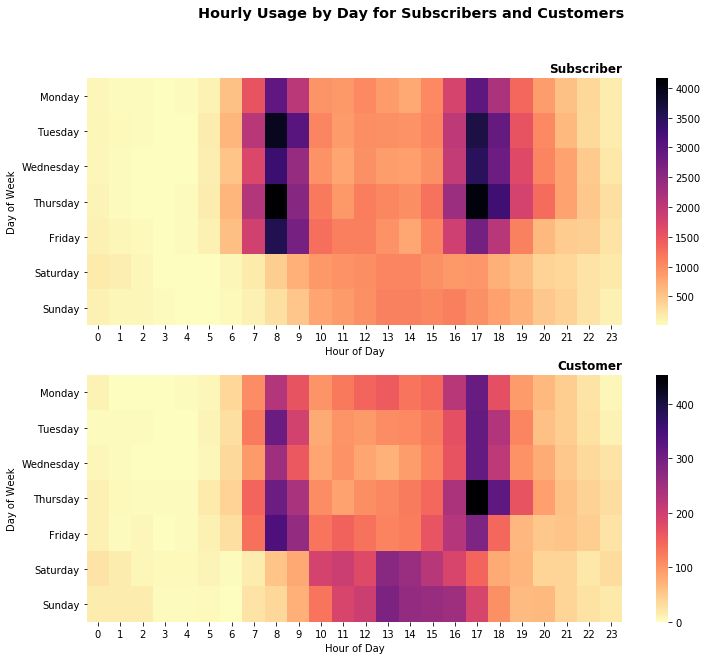

In [4]:
# Convert the start_day column from a plain object type into an ordered categorical type
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered_days = pd.api.types.CategoricalDtype(ordered = True, categories = days_of_week)
bike['start_day'] = bike['start_day'].astype(ordered_days)

# Create a new table `subscriber` counting the number of bike rides per DOW and HOD by subscriber-only user type
subscriber = bike.query("user_type == 'Subscriber'").groupby(['start_hour', 'start_day']).size()
subscriber = subscriber.unstack(level = 0)

# Create a new table `customer` counting the number of bike rides per DOW and HOD by customer-only user type\
customer = bike.query("user_type == 'Customer'").groupby(['start_hour', 'start_day']).size()
customer = customer.unstack(level = 0)

# Hourly Usage by Day of Week and User Type
plt.figure(figsize = [12,10]) 
plt.suptitle('Hourly Usage by Day for Subscribers and Customers', fontsize = 'x-large', fontweight = 'bold')

# Subscriber heatmap on top
plt.subplot(2, 1, 1) # 2 rows, 1 col, subplot 1
sb.heatmap(data = subscriber, cmap = 'magma_r')
plt.title('Subscriber', loc = 'right', fontweight = 'bold')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week');
# plt.hist2d(data = subscriber, x = 'start_hour', y = 'start_day') doesn't work because start_day is categorical

# Customer heatmap on bottom
plt.subplot(2, 1, 2) # 2 rows, 1 col, subplot 2
sb.heatmap(data = customer, cmap = 'magma_r')
plt.title('Customer', loc = 'right', fontweight = 'bold')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week');

## Trip Duration by Day of Week and User Type

> Subscribers make much shorter trips compared to customers, no matter which day of the week. Since subscribers rent bikes primarily for getting to and from work on the weekdays, average trip duration stays fairly constant. Duration increases slightly on the weekends for them, but even moreso for customers. One guess is that the customer group has a lot of tourists who use bikes as a cheaper and more unique way to explore San Francisco and the Bay Area.

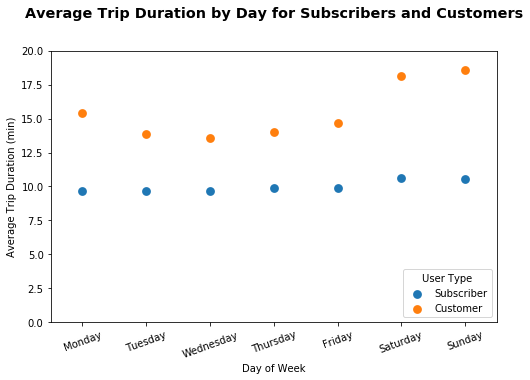

In [5]:
# Remove duration_min outliers
bike = bike[bike.duration_min <= 70]

# Trip Duration by Day of Week and User Type
plt.figure(figsize = [8,5]) 
sb.pointplot(data = bike, x = 'start_day', y = 'duration_min', hue = 'user_type',
             ci = None, linestyles ="")
plt.title('Average Trip Duration by Day for Subscribers and Customers', 
          fontsize = 'x-large', fontweight = 'bold', y = 1.1)
plt.xlabel('Day of Week')
plt.ylabel('Average Trip Duration (min)')
plt.legend(title = 'User Type', loc = 'lower right')
plt.xticks(rotation = 20)
plt.ylim(0, 20);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!